BY: **RIYA JOSHI**

EMAIL: riya.joshi@somaiya.edu



---


### **Basic idea behind K-means clustering algorithm**:

*   It is an iterative algorithm that divides the unlabeled dataset into k different clusters. The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.
* It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.











### **Applications of K-means clustering**:
* Market segmentation
* Document clustering
* Image segmentation
* Image compression
* Vector quantization
* Cluster analysis
* Feature learning or dictionary learning
* Clustering of IT assets
* Customer segmentation
* Used in search engines




---




In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('players_20.csv') # importing dataset 
df.head() # displaying first five records from the dataset

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,01-07-2019,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [4]:
# replacing null values with 0
df = df.fillna(value= 0)

### **K-means**

Steps:



1.   **Decide 'k' i.e no of clusters to be formed** (K can be determined using some
techniques like Elbow Method using WCSS(Within
Cluster Sum of Squares), Silhouette Method. )
2.   **Compute random seed points as the centroids or
K points of the clusters of the current partitioning**

3. **Assign each object to the cluster with the nearest
seed point based on eulidean distance.** ( Partition objects
into k nonempty subsets by seeing
the closest centroids for each data points. )

4. **Calculate the variance and place a new centroid of
each cluster based on mean value of the cluster.**
( Better choice is to place them as much as possible
far away from each other. )

5. **Go back to Step 3, stop when the assignment does**


In [5]:
# making numpy array of attributes weight_kg and height_cm for performing k means clustering 
kmean_array=np.array(df[['weight_kg','height_cm']])
kmean_array

array([[ 72, 170],
       [ 83, 187],
       [ 68, 175],
       ...,
       [ 75, 186],
       [ 74, 185],
       [ 78, 182]])

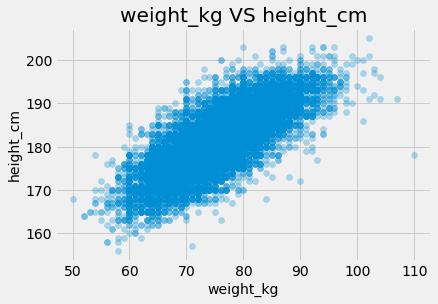

In [6]:
# Initial look at the distribution of attributes weight_kg and height_cm data
style.use('fivethirtyeight')
plt.title('weight_kg VS height_cm')
plt.xlabel("weight_kg", fontsize=14)
plt.ylabel("height_cm", fontsize=14)
plt.scatter(kmean_array[:, 0], kmean_array[:, 1], alpha=0.3)
plt.show()

## (1) Without using any in-built K-means method / writing from scratch

In [7]:
clusters = {} # Initiate empty clusters

# this function return clusters dict which contains data points that are being put according to the cluster they belong
def compute_clusters(df, centroids, k):
  
    # Set the range for value of k 
    for i in range(k):
        clusters[i] = []
      
    # Calculating euclidean distance and appending points according the closest distance from the centroids
    for data in df:
        euclidean_dist_list = []
        for j in range(k):
            euclidean_dist_list.append(np.linalg.norm(data - centroids[j]))#calculating euclidean distances and appending
        clusters[euclidean_dist_list.index(min(euclidean_dist_list))].append(data)#appending points

    return clusters    

# this function returns centroids dict  which contains centroids
def compute_centroids(centroids, clusters, k):
    for i in range(k):
        centroids[i] = np.mean(clusters[i], axis=0)# Finds the average of the cluster at given index
    return centroids

# this function is used for plotting the clusters
def plot_clusters(centroids, clusters, k):
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple','pink','brown']
    plt.figure(figsize = (6, 4))  
    area = (20) ** 2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6) # plotting the points       
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=150)# plotting centroids

# this is the main or driver function where all the above function are called and values, plots are displayed
# we are choosing k=3 and number of iteration=100
def k_means(df, centroids={}, k=3, repeats=100):
    for i in range(k):
        centroids[i] = df[i]# Sets up the centroids based on the data

    # Outputs the calculated clusters and centroids 
    print('Position of centroid for every iteration')
    for i in range(repeats):        
        clusters = compute_clusters(df, centroids, k)  
        centroids = compute_centroids(centroids, clusters, k) 
        # Plot the first and last iteration of k_means given the repeats specified
        # Default is 100, so this would output the 1st iteration and the 100th
        if i == range(repeats)[-1] or i == range(repeats)[0]:
            plot_clusters(centroids, clusters, k) 

        print("Centroids:",centroids)

Position of centroid for every iteration
Centroids: {0: array([ 72.11809191, 171.88248982]), 1: array([ 80.75112057, 186.6451143 ]), 2: array([ 69.58834316, 177.32167649])}
Centroids: {0: array([ 69.73597961, 171.45739257]), 1: array([ 80.89863391, 186.74928252]), 2: array([ 70.32663832, 178.46987245])}
Centroids: {0: array([ 67.17455896, 171.45713401]), 1: array([ 81.29998771, 187.05210766]), 2: array([ 71.97134588, 179.29334298])}
Centroids: {0: array([ 66.59633803, 172.04873239]), 1: array([ 81.86354936, 187.54060705]), 2: array([ 72.93417858, 179.72659833])}
Centroids: {0: array([ 66.60174881, 172.38712242]), 1: array([ 82.2945829 , 187.93657663]), 2: array([ 73.44482891, 180.0571575 ])}
Centroids: {0: array([ 66.79607177, 172.7757032 ]), 1: array([ 82.5465995 , 188.17238665]), 2: array([ 73.83978467, 180.35631889])}
Centroids: {0: array([ 66.99211868, 172.89638387]), 1: array([ 82.77894212, 188.43097139]), 2: array([ 74.09834004, 180.61066398])}
Centroids: {0: array([ 67.12355128,

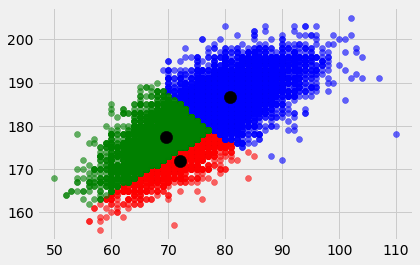

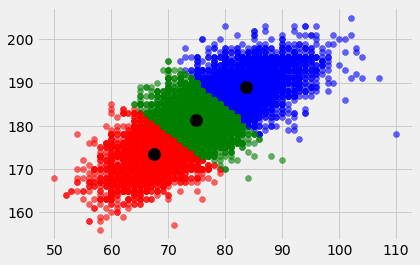

In [9]:
k_means(kmean_array)

In [10]:
clusters

{0: [array([ 72, 170]),
  array([ 68, 175]),
  array([ 66, 172]),
  array([ 71, 175]),
  array([ 72, 168]),
  array([ 70, 173]),
  array([ 69, 170]),
  array([ 67, 173]),
  array([ 69, 175]),
  array([ 64, 173]),
  array([ 67, 179]),
  array([ 61, 169]),
  array([ 68, 170]),
  array([ 70, 174]),
  array([ 59, 163]),
  array([ 60, 165]),
  array([ 68, 172]),
  array([ 73, 175]),
  array([ 64, 178]),
  array([ 69, 179]),
  array([ 73, 173]),
  array([ 65, 181]),
  array([ 68, 165]),
  array([ 67, 176]),
  array([ 67, 178]),
  array([ 73, 171]),
  array([ 75, 173]),
  array([ 70, 175]),
  array([ 61, 170]),
  array([ 69, 175]),
  array([ 65, 176]),
  array([ 70, 172]),
  array([ 67, 179]),
  array([ 63, 172]),
  array([ 68, 177]),
  array([ 68, 179]),
  array([ 69, 171]),
  array([ 62, 171]),
  array([ 66, 180]),
  array([ 72, 175]),
  array([ 70, 174]),
  array([ 70, 174]),
  array([ 67, 180]),
  array([ 71, 174]),
  array([ 66, 174]),
  array([ 67, 178]),
  array([ 70, 171]),
  array([ 

In [11]:
len(clusters[0])+len(clusters[1])+len(clusters[2])

18278

In [12]:
print("No: of data points in clusters :","Cluster 1= ",len(clusters[0])," ","Cluster 2= ",len(clusters[1])," ","Cluster 3= ",len(clusters[2]))

No: of data points in clusters : Cluster 1=  5073   Cluster 2=  5076   Cluster 3=  8129


## (2) Using in-built K-means method (SKLEARN)

In [13]:
def sklearn_k_means(X, k=3, iterations=10):

    # using in-built method and setting parameters
    km = KMeans(
        n_clusters=k, init='random',
        n_init=iterations, max_iter=300, 
        random_state=0
    )

    # fitting model
    y_km = km.fit_predict(X)

    # ploting the 3 clusters
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, 
        c='blue',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, 
        c='red',
        label='cluster 2'
    )
    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, 
        c='green',
        label='cluster 3'
    )

    # plotting the centroids
    for i in range(3):
        plt.scatter(
            km.cluster_centers_[-i, 0], km.cluster_centers_[-i, 1],
            s=100,
            c='black',
            label='centroids'
        )
    plt.legend(scatterpoints=1)
    plt.title('Clustered Data')
    plt.xlabel("weight_kg", fontsize=14)
    plt.ylabel("height_cm", fontsize=14)
    plt.grid()
    plt.show()

# Calculating distortion (noise) for a range of number of cluster
    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(X)
        distortions.append(km.inertia_)

    # Plot k vs distortion
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.annotate('Elbow',
             xy=(3, distortions[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
    plt.show()


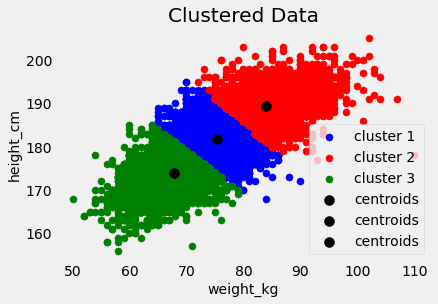

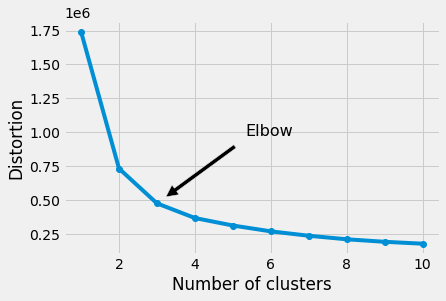

In [14]:
sklearn_k_means(kmean_array)

### Elbow method graph
As we can see, there is an elbow at $k=3$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=3$ is a pretty good choice. 